About NETFLIX

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

Business Problem

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries

##Import Libraries

In [ ]:
import pandas as pd
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/netflix.csv')

##Analyzing Basic Metrics

In [ ]:
data.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


2. Observations on the shape of data, data types of all the attributes, conversion of categorical attributes to 'category' (If required), missing value detection, statistical summary

In [ ]:
#Shape of the dataset
data.shape

(8807, 12)

In [ ]:
#Columns in the dataset
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [ ]:
#Summary statistics for numerical columns
data.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [ ]:
data.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [ ]:
#Check for missing values
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [ ]:
#Removing the null values
data.dropna(subset=['title', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'], inplace=True)


In [ ]:
#Replcing null values
data['director'].fillna('Unknown Director', inplace = True)
data['cast'].fillna('Unknown Cast' , inplace = True)
data['country'].fillna('Unknown Country' , inplace = True)

In [ ]:
data.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [ ]:
#Conversion of Categorical Attributes
data['type'] = data['type'].astype('category')
data['rating'] = data['rating'].astype('category')

In [ ]:
data.dtypes

show_id           object
type            category
title             object
director          object
cast              object
country           object
date_added        object
release_year       int64
rating          category
duration          object
listed_in         object
description       object
dtype: object

##Non-Graphical Analysis: Value counts and unique attributes

In [ ]:
data['director'].value_counts()

Unknown Director                  2621
Rajiv Chilaka                       19
Raúl Campos, Jan Suter              18
Suhas Kadav                         16
Marcus Raboy                        16
                                  ... 
Raymie Muzquiz, Stu Livingston       1
Joe Menendez                         1
Eric Bross                           1
Will Eisenberg                       1
Mozez Singh                          1
Name: director, Length: 4527, dtype: int64

In [ ]:
data['type'].value_counts()

Movie      6126
TV Show    2664
Name: type, dtype: int64

In [ ]:
data['country'].value_counts()

United States                             2809
India                                      972
Unknown Country                            829
United Kingdom                             418
Japan                                      243
                                          ... 
Romania, Bulgaria, Hungary                   1
Uruguay, Guatemala                           1
France, Senegal, Belgium                     1
Mexico, United States, Spain, Colombia       1
United Arab Emirates, Jordan                 1
Name: country, Length: 749, dtype: int64

In [ ]:
data['country'].nunique()

749

In [ ]:
data['director'].nunique()

4527

##Visual Analysis

In [ ]:
filtered_cast = data.cast.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
filtered_cast = filtered_cast[filtered_cast != 'Unknown Cast']
filtered_cast

1                  Ama Qamata
1                 Khosi Ngema
1               Gail Mabalane
1              Thabang Molaba
1            Dillon Windvogel
                ...          
8806         Manish Chaudhary
8806             Meghna Malik
8806            Malkeet Rauni
8806           Anita Shabdish
8806    Chittaranjan Tripathy
Length: 64016, dtype: object

In [ ]:
data['director'] = data['director'].str.replace('[', '').str.replace(']', '')
data['director']

<ipython-input-109-7b2a25bfcb28>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['director'] = data['director'].str.replace('[', '').str.replace(']', '')


0        Kirsten Johnson
1       Unknown Director
2        Julien Leclercq
3       Unknown Director
4       Unknown Director
              ...       
8802       David Fincher
8803    Unknown Director
8804     Ruben Fleischer
8805        Peter Hewitt
8806         Mozez Singh
Name: director, Length: 8790, dtype: object

In [ ]:
filtered_countries = data.country.str.split(', ',expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filtered_countries[filtered_countries != 'Unknown Country']

In [ ]:
filtered_countries

0       United States
1        South Africa
4               India
7       United States
7               Ghana
            ...      
8801           Jordan
8802    United States
8804    United States
8805    United States
8806            India
Length: 9999, dtype: object

###continuous variable(s)


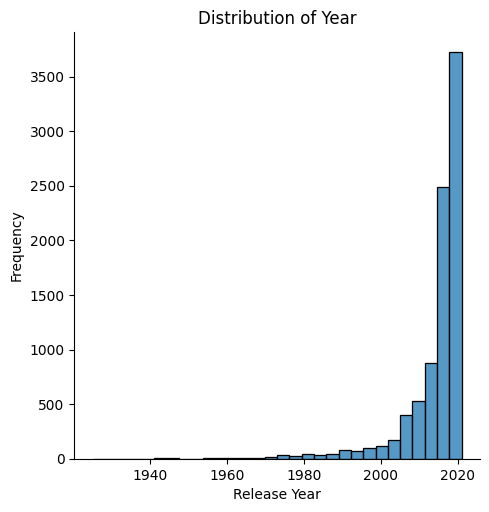

In [ ]:
sns.displot(data['release_year'] , kde = False , bins=30)
plt.title('Distribution of Year')
plt.xlabel('Release Year')
plt.ylabel('Frequency')
plt.show()

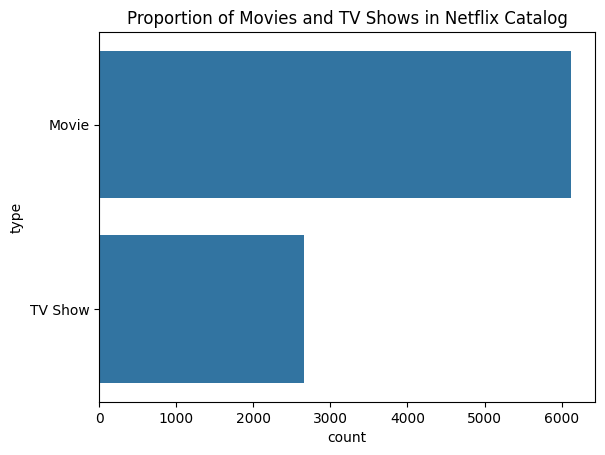

In [ ]:
sns.countplot(data['type'])
plt.title('Proportion of Movies and TV Shows in Netflix Catalog')
plt.show()


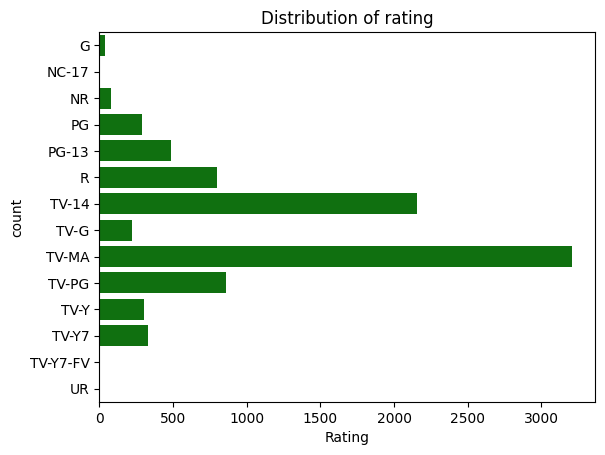

In [ ]:
sns.countplot(data['rating'] , color = 'green')
plt.title('Distribution of rating')
plt.xlabel('Rating')
plt.ylabel('count')
plt.show()


 For correlation: Heatmaps, Pairplots (10 Points)

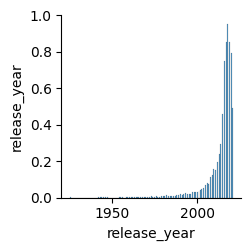

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8790 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       8790 non-null   object  
 1   type          8790 non-null   category
 2   title         8790 non-null   object  
 3   director      8790 non-null   object  
 4   cast          8790 non-null   object  
 5   country       8790 non-null   object  
 6   date_added    8790 non-null   object  
 7   release_year  8790 non-null   int64   
 8   rating        8790 non-null   category
 9   duration      8790 non-null   object  
 10  listed_in     8790 non-null   object  
 11  description   8790 non-null   object  
dtypes: category(2), int64(1), object(9)
memory usage: 1.0+ MB


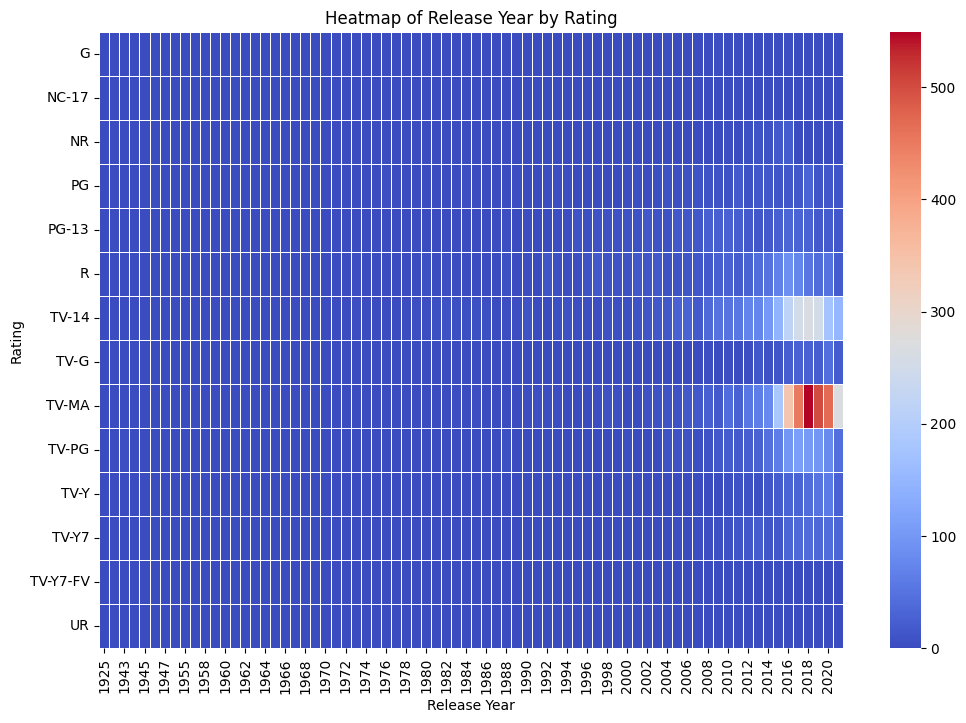

In [ ]:
heatmap_data = data.pivot_table(index='rating', columns='release_year', aggfunc='size', fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='d', linewidths=.5)
plt.title('Heatmap of Release Year by Rating')
plt.xlabel('Release Year')
plt.ylabel('Rating')
plt.show()

Missing Value & Outlier check (Treatment optional) (10 Points)

In [ ]:
# Check for missing values
missing_values = data.isnull().sum()
missing_values


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

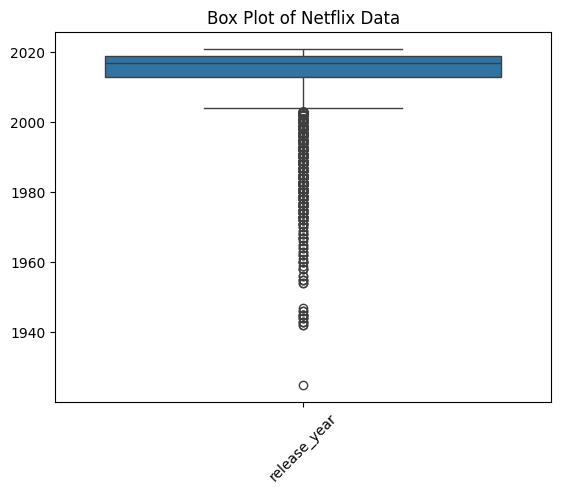

In [ ]:
# Create a box plot to visualize outliers in numeric columns
sns.boxplot(data=data)
plt.title('Box Plot of Netflix Data')
plt.xticks(rotation=45)
plt.show()


Insights based on Non-Graphical and Visual Analysis (10 Points)



- Comparison of TV Shows vs. Movies

<ipython-input-31-78799a5a264c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(movie_countries, palette='hls')


Text(0, 0.5, 'Movies')

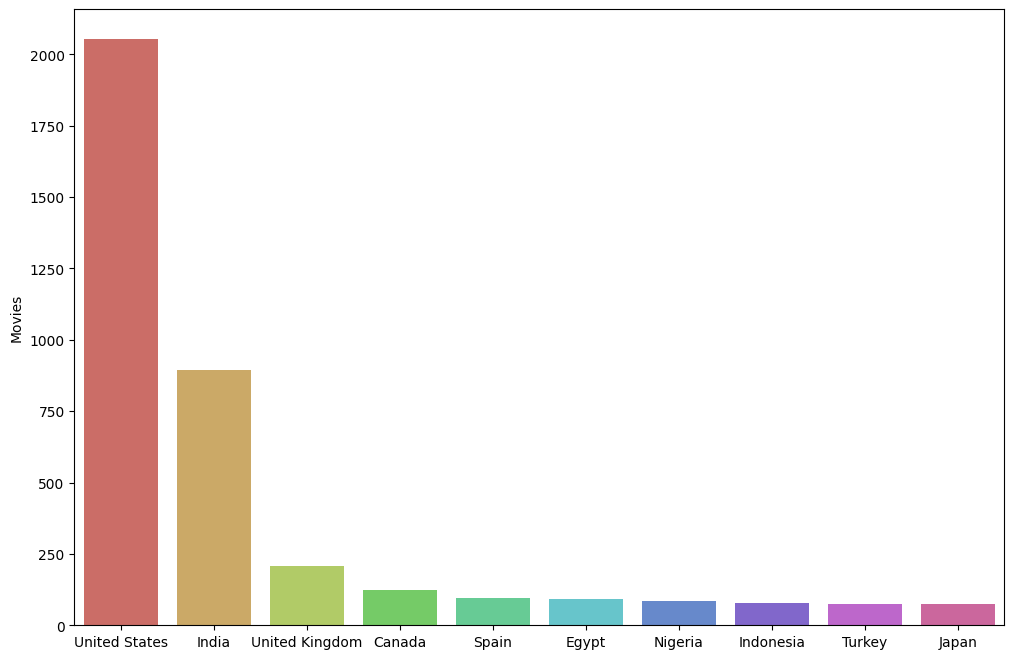

In [ ]:
movie_countries = data[data['type'] == 'Movie']['country'].value_counts()
movie_countries = movie_countries[movie_countries.index != 'Unknown Country'].head(10)


plt.figure(figsize = (12,8))
sns.barplot(movie_countries, palette='hls')
plt.ylabel('Movies')

In [ ]:
tv_show_countries

United States     2055
India              893
United Kingdom     206
Canada             122
Spain               97
Egypt               92
Nigeria             86
Indonesia           77
Turkey              76
Japan               76
Name: country, dtype: int64

<ipython-input-141-a745fc55c74c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(tv_show_countries, palette='deep')


Text(0, 0.5, 'Movies')

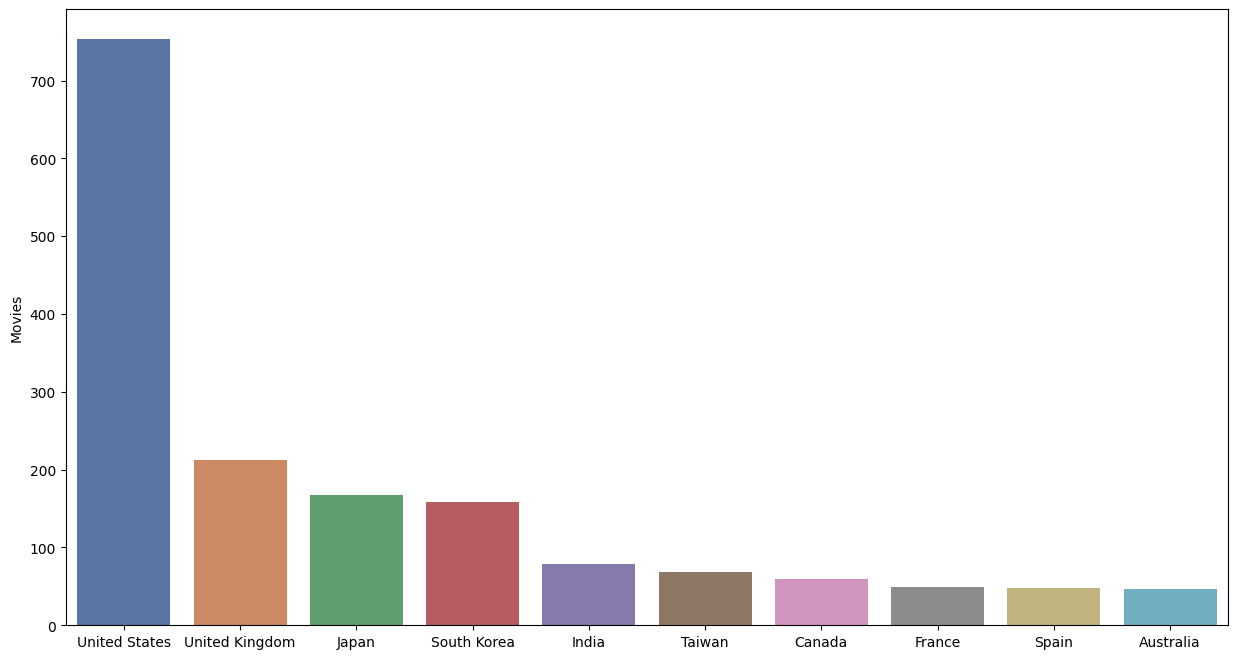

In [ ]:
tv_show_countries = data[data['type'] == 'TV Show']['country'].value_counts()
tv_show_countries = tv_show_countries[tv_show_countries.index != 'Unknown Country'].head(10)
plt.figure(figsize = (15,8))
sns.barplot(tv_show_countries, palette='deep')
plt.ylabel('Movies')

 - Best time to launch a TV show or movie

In [ ]:
data['Date_added'] = pd.to_datetime(data['date_added'])
data['week'] = data['Date_added'].dt.week
data['Month'] = data['Date_added'].dt.month


# Group by week and month and count the total number of movies/TV shows
week_counts = data.groupby(['type', 'week'])['title'].count()

week_counts.sort_values(ascending = False)


<ipython-input-49-73871b1d45f6>:2: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  data['week'] = data['Date_added'].dt.week


type     week
Movie    1       316
         44      243
         40      215
         9       206
         26      195
                ... 
TV Show  4        32
         3        32
         2        30
         10       28
         43       28
Name: title, Length: 106, dtype: int64

In [ ]:
month_counts = data.groupby(['type', 'Month'])['title'].count()

month_counts.sort_values(ascending = False)

type     Month
Movie    7        565
         4        549
         12       547
         1        545
         10       545
         3        528
         8        518
         9        518
         11       498
         6        492
         5        439
         2        382
TV Show  12       265
         7        262
         9        251
         6        236
         8        236
         10       215
         4        214
         3        213
         11       207
         5        193
         1        192
         2        180
Name: title, dtype: int64

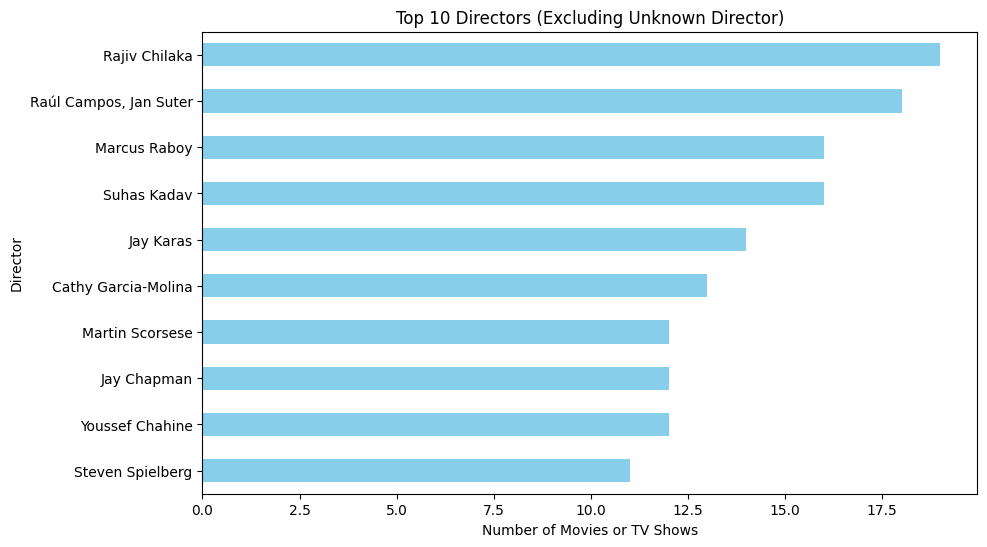

In [ ]:

filtered_data = data[data['director'] != 'Unknown Director']
top_directors = filtered_data['director'].value_counts().head(10)

plt.figure(figsize=(10, 6))
top_directors.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Movies or TV Shows')
plt.ylabel('Director')
plt.title('Top 10 Directors')
plt.gca().invert_yaxis()
plt.show()


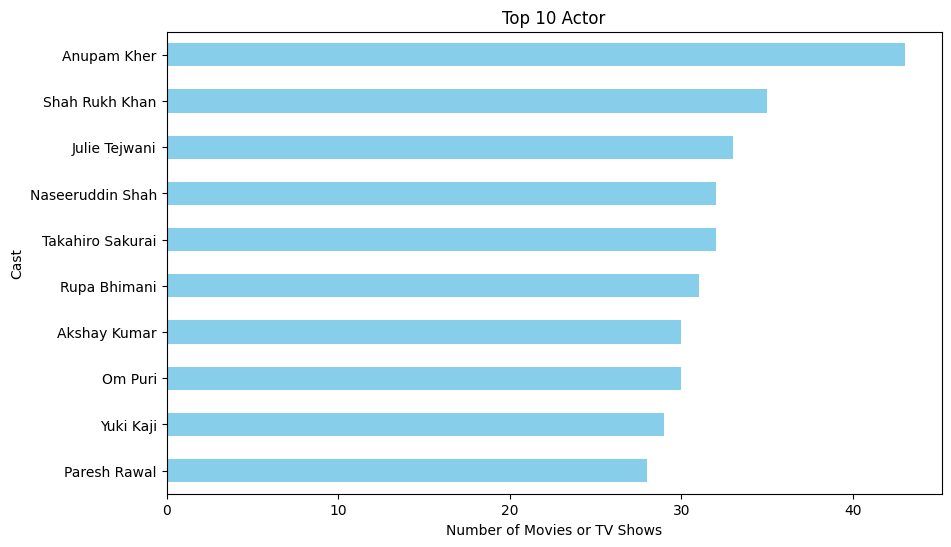

In [ ]:

top_cast = filtered_cast.value_counts().head(10)

plt.figure(figsize=(10, 6))
top_cast.plot(kind='barh', color='skyblue')
plt.xlabel('Number of Movies or TV Shows')
plt.ylabel('Cast')
plt.title('Top 10 Actor')
plt.gca().invert_yaxis()
plt.show()


 - Which genre movies are more popular or produced more

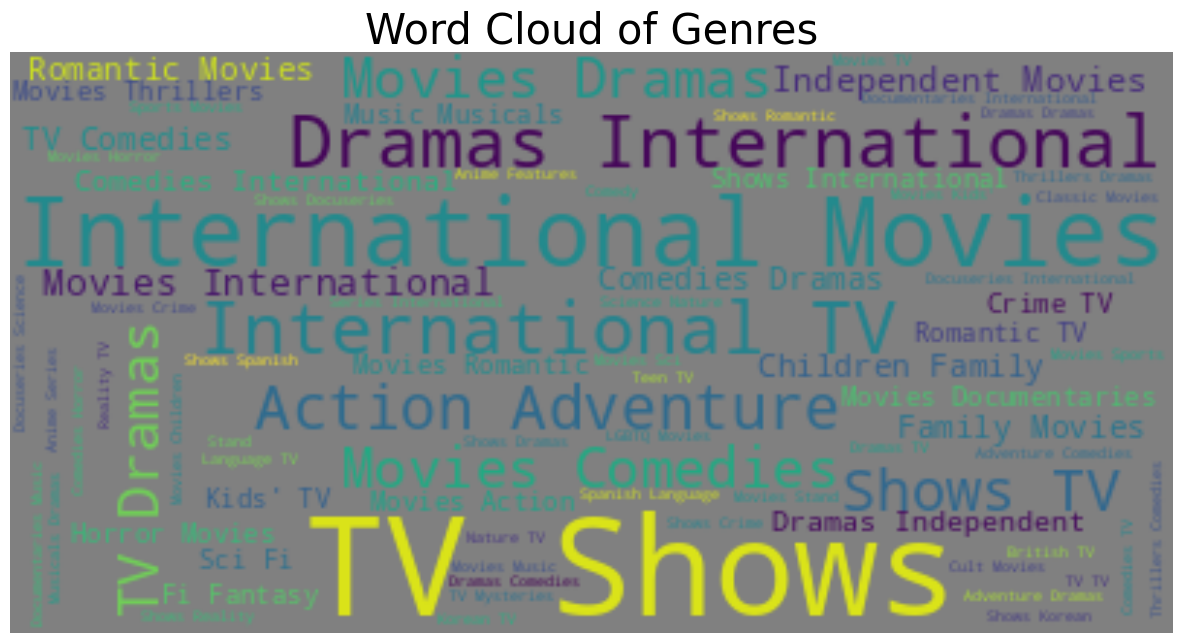

In [ ]:
from wordcloud import WordCloud

# Join all genre names into a single string
text = " ".join(str(each) for each in data['listed_in'])

# Create and generate a word cloud image
wordcloud = WordCloud(max_words=200, background_color="gray").generate(text)

# Display the generated image
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Genres', fontsize=30)
plt.axis("off")
plt.show()


In [ ]:

# Convert 'release_year' column to datetime
data['release_year'] = pd.to_datetime(data['release_year'], format='%Y')

# Convert 'date_added' column to datetime
data['date_added'] = pd.to_datetime(data['date_added'])

# Calculate the time difference between release year and date added
data['Release_to_Netflix'] = (data['date_added'] - data['release_year']).dt.days

# Get mode of difference
mode_diff = data['Release_to_Netflix'].mode()[0]
print("Mode of time difference between movie release and Netflix addition:", mode_diff)


Mode of time difference between movie release and Netflix addition: 334


**Business Insights : **

1. From graphical analysis - it`s evident that Netflix has a higher count of movies compared to TV Shows. This suggests that Netflix might have a larger library of movies than TV shows.

2. Top Countries for production - United States, India, United Kingdom, Canada, Spain are the top countries for  movies Production and United States, United Kingdom, Japan, South Korea, India are the top countries for TV show Production

3. Best time to release -  For Movies: The month with the highest count of movie releases is July (Month 7), closely followed by April (Month 4) and December (Month 12).
The week with the highest count of movie releases is Week 1, followed by Week 44 and Week 40.

 For TV Shows: The month with the highest count of TV show releases is December (Month 12), followed by July (Month 7) and September (Month 9).
The week with the highest count of TV show releases is Week 12, followed by Week 7 and Week 9.

4. Top Directors and Actors - Identifying the top directors and actors with the most appearances in Netflix content provides insights into popular talent.

5. Popular Genres - The word cloud of genres indicates the most popular genres among Netflix content.

6. Time Between Movie Release and Netflix Addition - the mode of the time difference between movie release and Netflix addition is 334 days, it means
that the most common time interval between the release of a movie and its addition to Netflix is approximately 334 days.

Overall, these insights can inform Netflix's content acquisition, production, and release strategies, enabling the platform to better cater to the preferences of its global audience and maintain its competitive edge in the streaming industry.




**Recommendations: **

1.  While Netflix currently has a larger library of movies, it should invest in expanding its collection of TV shows to cater to the preferences of a broader audience.

2. Focus on acquiring and producing content from the top countries for movie and TV show production, such as the United States, India, United Kingdom, and others. Collaborating with local filmmakers and studios can help Netflix capture regional preferences and cultural diversity.

3. Utilize the insights on peak months and weeks for content releases to strategically plan the launch of new movies and TV shows.

4. Partnerships with top directors and actors identified in the analysis to create exclusive content for Netflix. Leveraging their popularity can attract a wider audience and differentiate Netflix's offerings in the competitive streaming landscape.

5. Invest in acquiring and producing content across a diverse range of genres to cater to varied viewer preferences and interests.

6. Based on the mode of the time difference between movie release and Netflix addition, refine the content acquisition strategy to acquire movies closer to their release dates. This approach ensures that Netflix offers fresh and in-demand titles to subscribers.

7. Implement a robust data analytics framework to continuously monitor viewer behavior, content trends, and market dynamics. Regular analysis of viewer feedback and content performance will help Netflix adapt its strategies in real-time and stay ahead of evolving viewer preferences.